In [1]:
import pipeline

from sklearn.metrics import * 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pipeline import analyze_best_model

from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# setup 
df = pd.read_csv('data/final_merged_df.csv')

splits = pipeline.split_all_years(df, colname='year_evictions')
pipeline.split_boundaries(splits, colname='year_evictions')
cleaned_splits = [pipeline.clean_split(split) for split in splits]
labeled_splits = [pipeline.label(split, lower_bound=14, drop_column=True)
                  for split in cleaned_splits]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a79240>]],
      dtype=object)

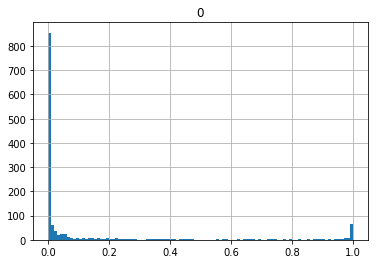

In [3]:
# classifiers 
train_df = labeled_splits[5][0]
test_df = labeled_splits[5][1]

model = LogisticRegression()
params = {'solver':'liblinear', 'C': 0.1, 'penalty': 'l1'}
label ='label'

X_train, X_test, y_train, y_test = analyze_best_model.split_dfs(train_df, test_df, label)
pred_scores = model.set_params(**params).fit(X_train, y_train).predict_proba(X_test)[:,1]

# histogram 
pd.DataFrame(pred_scores).hist(bins=100)

## sorted data frame 
# results = pd.DataFrame(pred_scores)
# results.sort_values(by=results.columns[0])

## top blocks 
# analyze_best_model.top_k_blocks_clf(model, params, train_df, test_df, label, k).head(10)

0.1377245508982036


<Figure size 432x288 with 0 Axes>

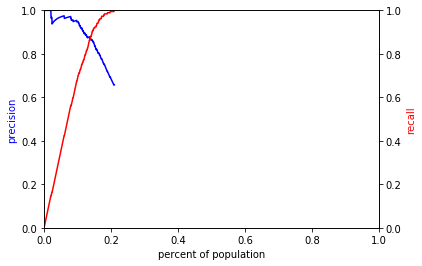

In [4]:
analyze_best_model.plot_precision_recall_n(model, params, train_df, test_df, label)

0.1377245508982036


<Figure size 432x288 with 0 Axes>

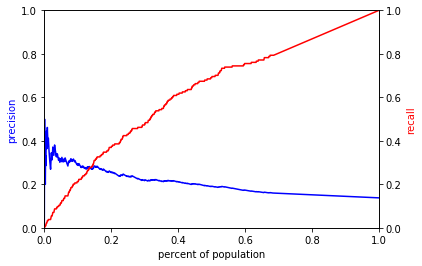

In [8]:
model = KNeighborsClassifier()
params = {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
label ='label'

X_train, X_test, y_train, y_test = analyze_best_model.split_dfs(train_df, test_df, label)
pred_scores = model.set_params(**params).fit(X_train, y_train).predict_proba(X_test)[:,1]
analyze_best_model.plot_precision_recall_n(model, params, train_df, test_df, label)

In [5]:
#analyze_best_model.feature_importance_clf(model, params, train_df, test_df, label).head(10)

In [6]:
# # regresssions 
# train_df = cleaned_splits[5][0]
# test_df = cleaned_splits[5][1]

# params = {}
# model = LinearRegression()
# label ='evictions'
# k = 0.16

# analyze_best_model.top_k_blocks_reg(model, params, train_df, test_df, label, k)

In [7]:
# analyze_best_model.feature_importance_reg(model, params, train_df, test_df, label).head(10)